In [213]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as  np


filename = "airbnb_data.csv"
data = pd.read_csv(filename)

for column in data.columns:
    print(column)


relevant_columns = ['host_since', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'average_review', 'host_listings_count', 'host_duration_years', 'price', 'accommodates']

df_RQ2 = data[relevant_columns]

df_RQ2 = df_RQ2.dropna()

df_RQ2['host_is_superhost'] = df_RQ2['host_is_superhost'].replace({'t': 1, 'f': 0})

unique_values = data['host_response_time'].unique()

df_RQ2['host_response_time'] = df_RQ2['host_response_time'].replace({'within an hour': 4, 'within a few hours': 3, 'within a day': 2, 'a few days or more': 1})

df_RQ2['price'] = df_RQ2['price'].replace('[$,]', '', regex=True).astype(float)

df_RQ2['host_since'] = pd.to_datetime(df_RQ2['host_since'])


# Check for missing values
missing_values = df_RQ2.isnull().sum()
print("Missing values:\n", missing_values)

print(df_RQ2.describe())

C:\Users\matth\AppData\Local\Temp\ipykernel_34216\2791956544.py:8: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(filename)


City
last_scraped
source
neighborhood_overview
picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
latitude
longitude
property_type
room_type
accommodates
bathrooms_text
beds
amenities
price
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_30
availability_60
availability_90
availability_365
calendar_last_scraped
number_of_reviews
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
review_scores_rating
review_scores_accuracy
review_scores_cleanliness
review_scores_checkin
review_scores_communication

C:\Users\matth\AppData\Local\Temp\ipykernel_34216\2791956544.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_RQ2['host_is_superhost'] = df_RQ2['host_is_superhost'].replace({'t': 1, 'f': 0})
C:\Users\matth\AppData\Local\Temp\ipykernel_34216\2791956544.py:24: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_RQ2['host_response_time'] = df_RQ2['host_response_time'].replace({'within an hour': 4, 'within a few hours': 3, 'within a day': 2, 'a few days or more': 1})


                          host_since  host_response_time  host_response_rate  \
count                         113009       113009.000000       113009.000000   
mean   2017-05-27 12:30:11.579609088            3.643949            0.953948   
min              2008-08-13 00:00:00            1.000000            0.000000   
25%              2014-10-31 00:00:00            4.000000            1.000000   
50%              2016-11-01 00:00:00            4.000000            1.000000   
75%              2019-10-08 00:00:00            4.000000            1.000000   
max              2023-12-18 00:00:00            4.000000            1.000000   
std                              NaN            0.737613            0.160350   

       host_acceptance_rate  host_is_superhost  average_review  \
count         113009.000000      113009.000000   113009.000000   
mean               0.907267           0.368811        4.739563   
min                0.000000           0.000000        0.000000   
25%            

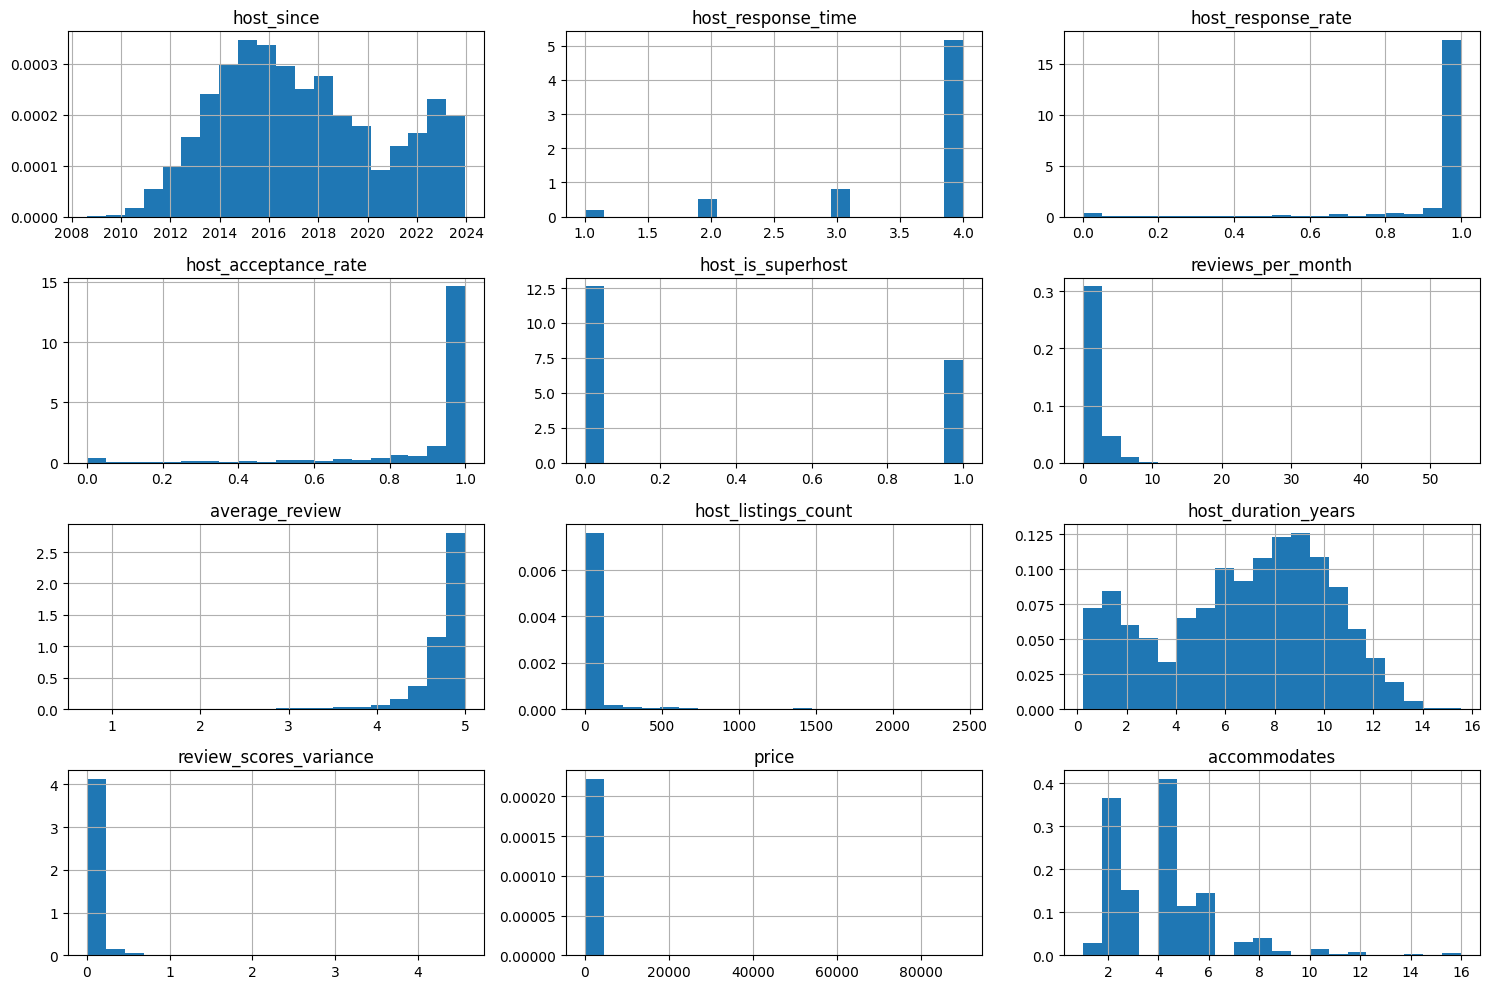

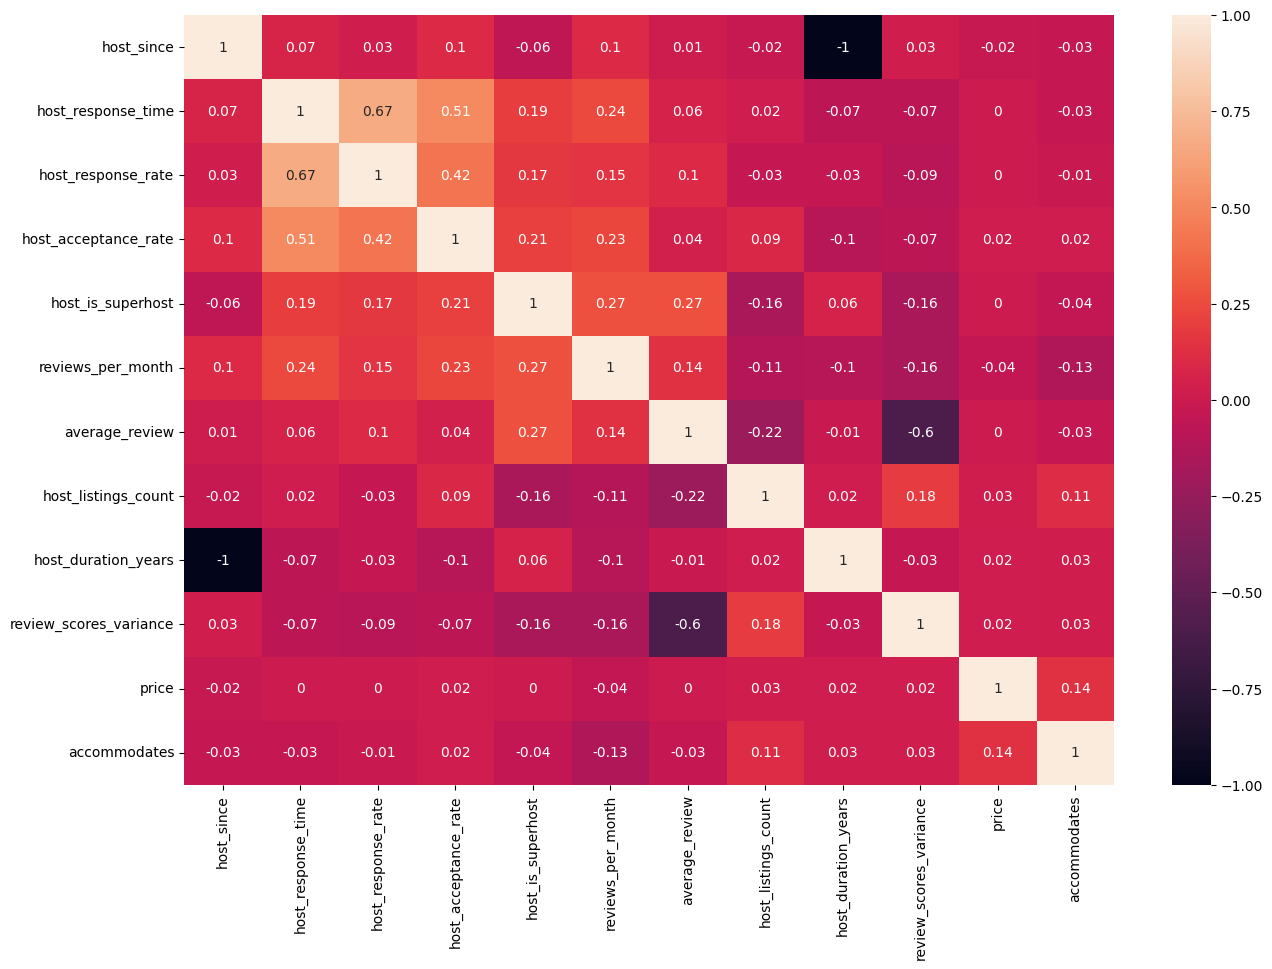

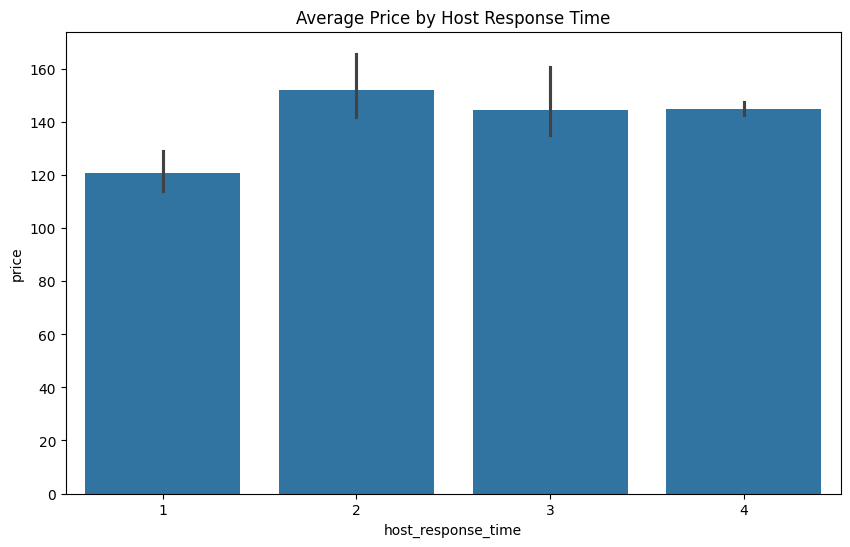

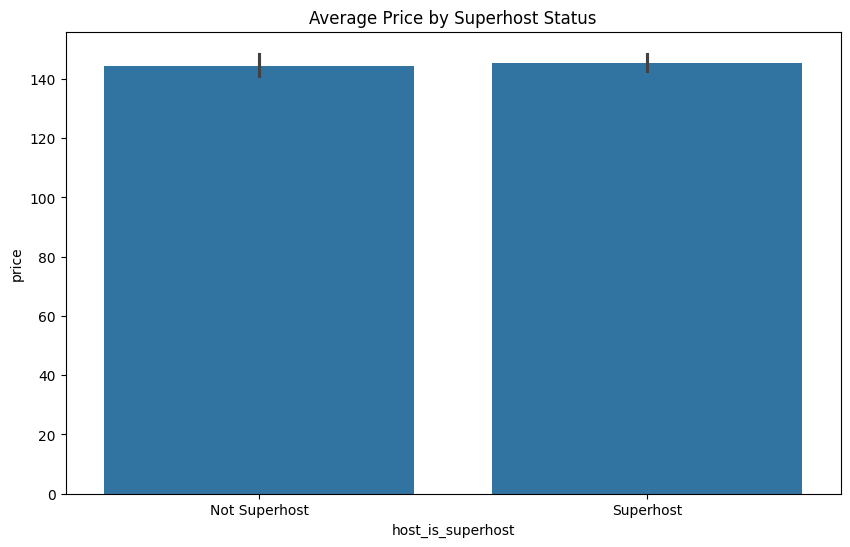

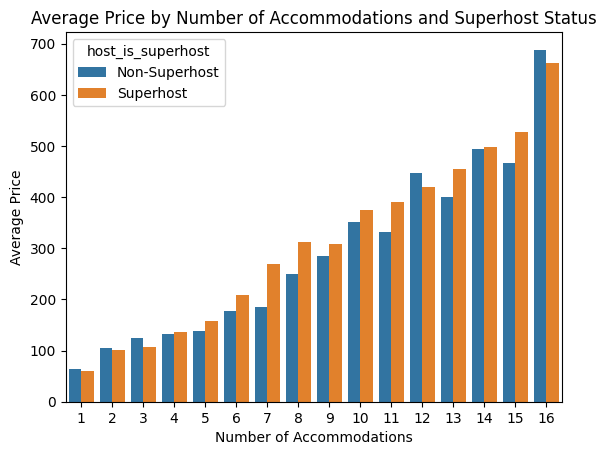

In [191]:
df_RQ2.hist(figsize=(15, 10), bins=20, density = True)
plt.tight_layout()
plt.show()

cor_df = df_RQ2.corr(method = "pearson").round(2)
plt.figure(figsize=(15, 10)) 
sns.heatmap(cor_df, annot=True)
plt.show()


plt.figure(figsize=(10, 6))
sns.barplot(x='host_response_time', y='price', data=df_RQ2, estimator=np.mean)
plt.title('Average Price by Host Response Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='host_is_superhost', y='price', data=df_RQ2, estimator=np.mean)
plt.title('Average Price by Superhost Status')
plt.xticks([0, 1], ['Not Superhost', 'Superhost'])  # If necessary, to clarify the categories
plt.show()

# Filter out only the necessary columns for this analysis
df_plot = df_RQ2[['accommodates', 'price', 'host_is_superhost']]

grouped = df_plot.groupby(['accommodates', 'host_is_superhost']).mean().reset_index()

grouped['host_is_superhost'] = grouped['host_is_superhost'].map({0: 'Non-Superhost', 1: 'Superhost'})

sns.barplot(data=grouped, x='accommodates', y='price', hue='host_is_superhost')
plt.title('Average Price by Number of Accommodations and Superhost Status')
plt.xlabel('Number of Accommodations')
plt.ylabel('Average Price')
plt.show()

In [310]:
import pandas as pd

file_path = "airbnb_data.csv"
data = pd.read_csv(file_path)



relevant_columns = ['host_neighbourhood','host_verifications','host_has_profile_pic','host_identity_verified','host_response_time', 'host_is_superhost', 'average_review', 'host_duration_years', 'host_listings_count', 'price', 'accommodates']

df_RQ2 = data[relevant_columns]

df_RQ2['price'] = df_RQ2['price'].replace('[\$,]', '', regex=True).astype(float)
df_RQ2 = df_RQ2.dropna(subset=['price'])


print(df_RQ2.dtypes)


<>:12: SyntaxWarning: invalid escape sequence '\$'
<>:12: SyntaxWarning: invalid escape sequence '\$'
C:\Users\matth\AppData\Local\Temp\ipykernel_34216\3731536706.py:12: SyntaxWarning: invalid escape sequence '\$'
  df_RQ2['price'] = df_RQ2['price'].replace('[\$,]', '', regex=True).astype(float)
C:\Users\matth\AppData\Local\Temp\ipykernel_34216\3731536706.py:4: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


host_neighbourhood         object
host_verifications         object
host_has_profile_pic       object
host_identity_verified     object
host_response_time         object
host_is_superhost          object
average_review            float64
host_duration_years       float64
host_listings_count       float64
price                     float64
accommodates                int64
dtype: object


C:\Users\matth\AppData\Local\Temp\ipykernel_34216\3731536706.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RQ2['price'] = df_RQ2['price'].replace('[\$,]', '', regex=True).astype(float)


In [220]:
from sklearn.model_selection import train_test_split

X = df_RQ2.drop(['price'], axis=1)
y = df_RQ2['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [221]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.pipeline import Pipeline
import numpy as np

# Define numerical and categorical columns 
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = [col for col in X_train.select_dtypes(include=['object', 'bool', 'category']).columns]
date_cols = [col for col in X_train.select_dtypes(include=['datetime64[ns]']).columns]


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

preprocessor.fit(X_train)

X_train_transformed = preprocessor.transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

new_feature_names = preprocessor.get_feature_names_out()

# Convert transformed numpy arrays back to DataFrame with original feature names
X_train_df = pd.DataFrame(X_train_transformed, columns=new_feature_names)
X_test_df = pd.DataFrame(X_test_transformed, columns=new_feature_names)



In [48]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [ 400, 500, 600],
    'max_depth': [1, 2, 3], 
    'learning_rate': [0.065, 0.075, 0.08] 
}

# XGBoosted Regressor
xg = XGBRegressor(random_state=42)

# GridSearchCV with parameter grid 
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=4,                 
    scoring='neg_mean_squared_error',  
    verbose=10,           
    n_jobs=-1            
)

# Fit GridSearchCV 
grid_search.fit(X_train_df, y_train)

# Store and print best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

best_mse = -grid_search.best_score_
print(f"Best MSE from GridSearchCV: {best_mse}")



Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best parameters found: {'learning_rate': 0.065, 'max_depth': 2, 'n_estimators': 500}
Best MSE from GridSearchCV: 736667.6901439682
Test set MSE: 540315.1935979454


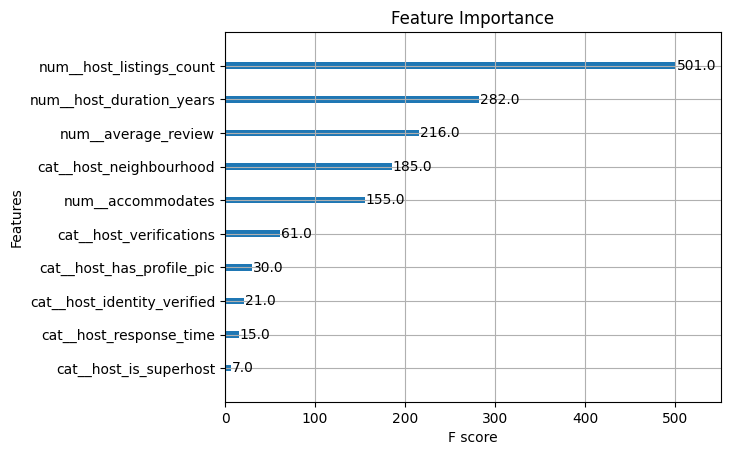

In [222]:
import xgboost as xgb
import matplotlib.pyplot as plt

dtrain = xgb.DMatrix(X_train_df, label=y_train)
dtest = xgb.DMatrix(X_test_df, label=y_test)

# XGBoost parameters
params = {
    'max_depth': 2,  
    'eta': 0.065,  
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}
trees = 500 

# Train the model
model = xgb.train(params, dtrain, trees)

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()




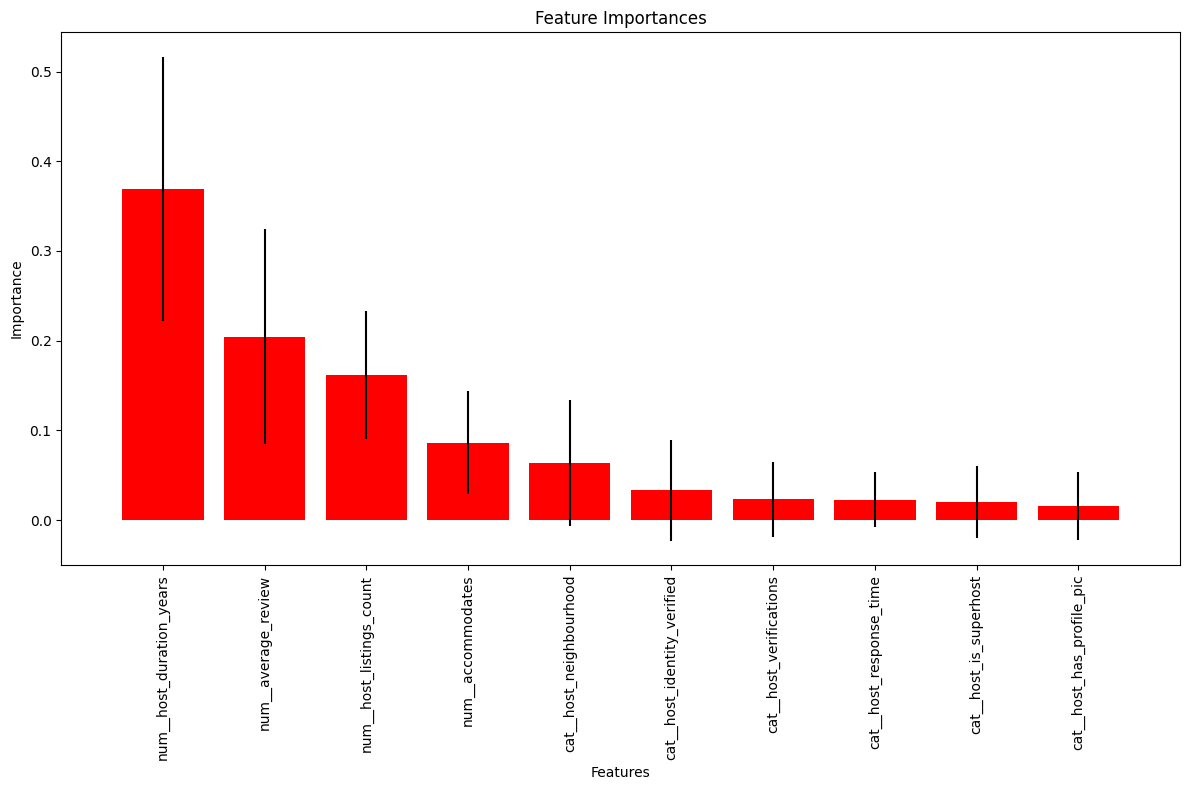

In [223]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=700, 
    max_depth=16, 
    max_features=0.3,
    random_state=42
)

# Fit the model
rf_model.fit(X_train_df, y_train)

# Find feature importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_train_df.columns[indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))  
plt.title("Feature Importances")
plt.bar(range(X_train_df.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_df.shape[1]), feature_names, rotation='vertical')  
plt.xlim([-1, X_train_df.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout() 
plt.show()

In [328]:
file_path_base = 'airbnb_data_v2.csv' 
data_base = pd.read_csv(file_path_base)

for column in data_base.columns:
    print(column)

print(data_base.dtypes)



host_about
host_is_superhost
host_listings_count
host_identity_verified
accommodates
beds
price
minimum_nights_avg_ntm
maximum_nights_avg_ntm
has_availability
availability_90
instant_bookable
reviews_per_month
bedrooms
baths
verification_count
average_review
distance_to_centre
host_duration_years
listing_age_years
recency_years
review_scores_variance
City_encoded
room_type_encoded
host_about                  int64
host_is_superhost         float64
host_listings_count       float64
host_identity_verified      int64
accommodates                int64
beds                      float64
price                     float64
minimum_nights_avg_ntm    float64
maximum_nights_avg_ntm    float64
has_availability            int64
availability_90             int64
instant_bookable            int64
reviews_per_month         float64
bedrooms                  float64
baths                       int64
verification_count          int64
average_review            float64
distance_to_centre        float64
host

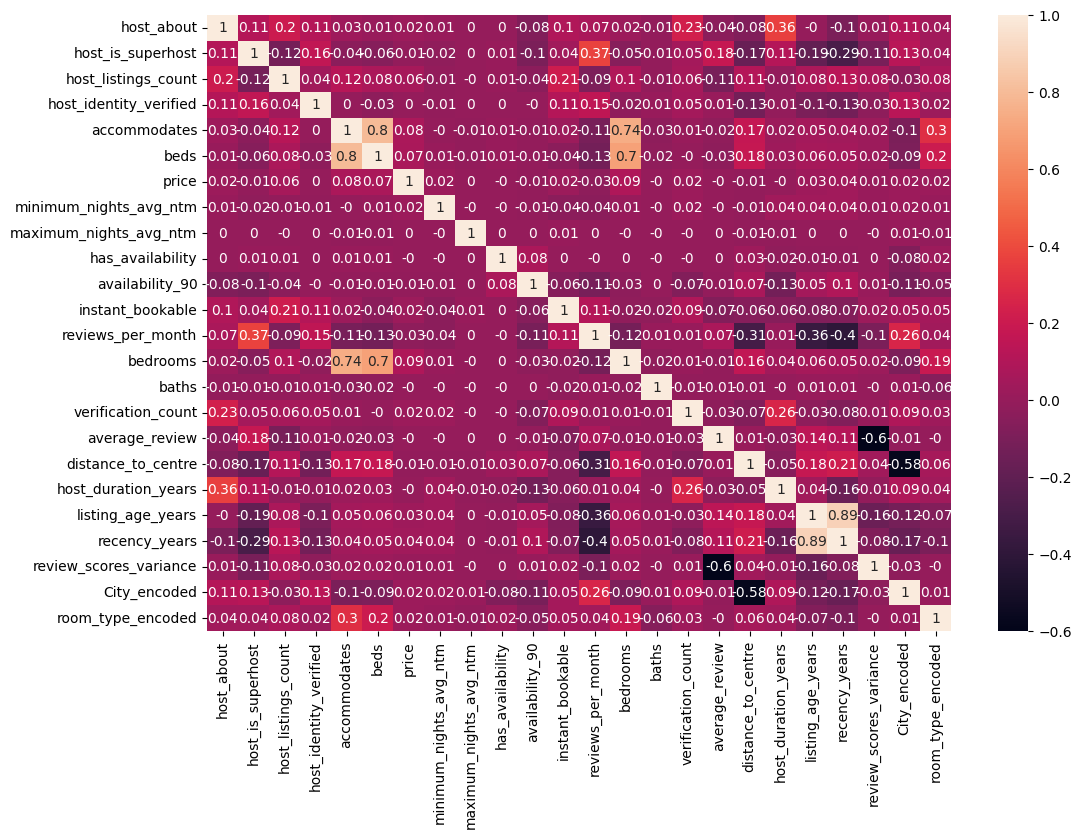

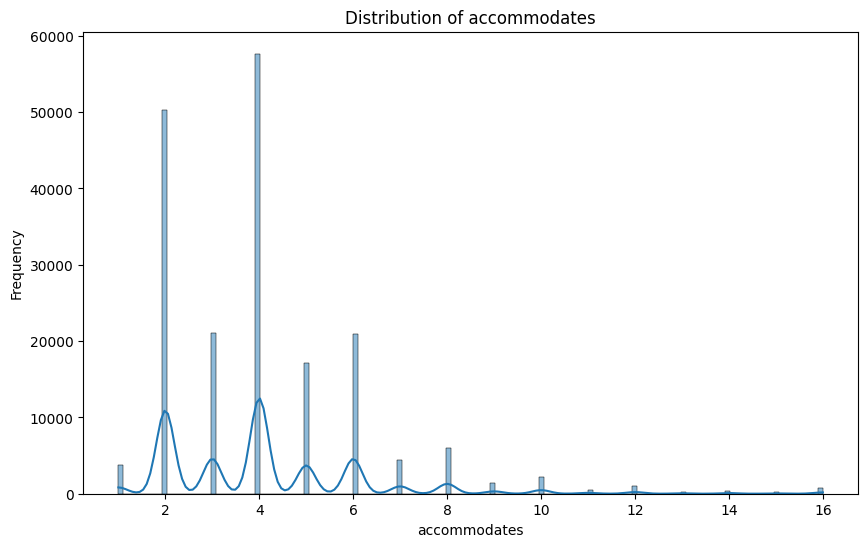

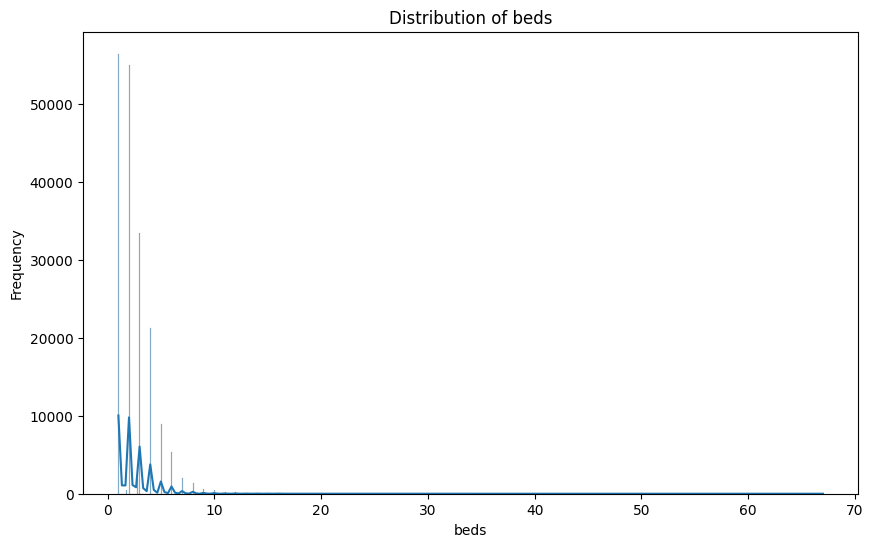

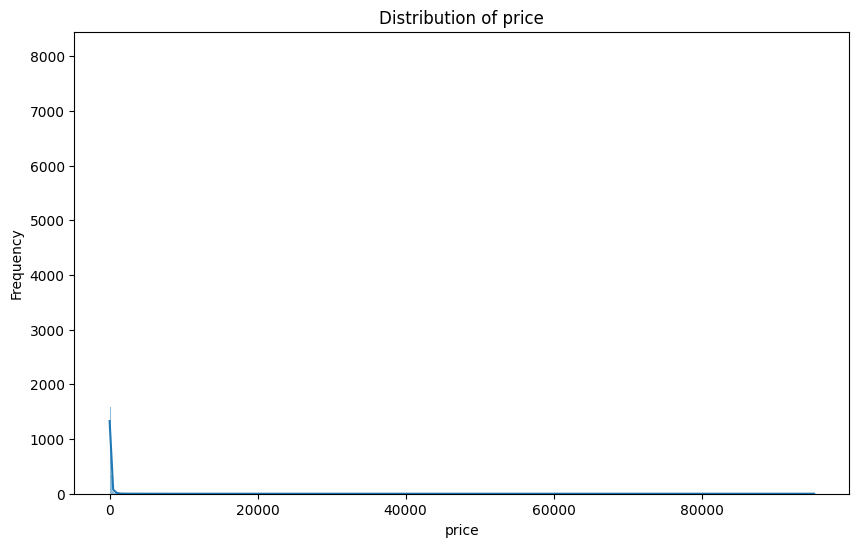

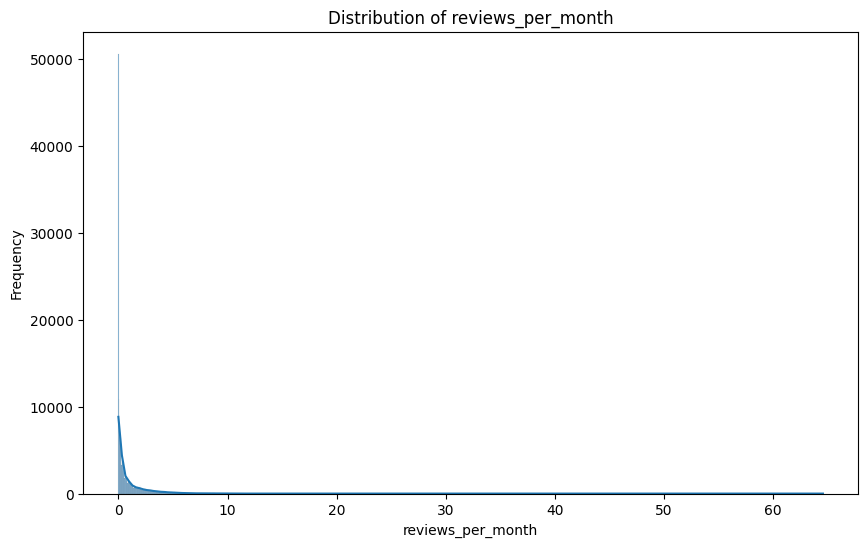

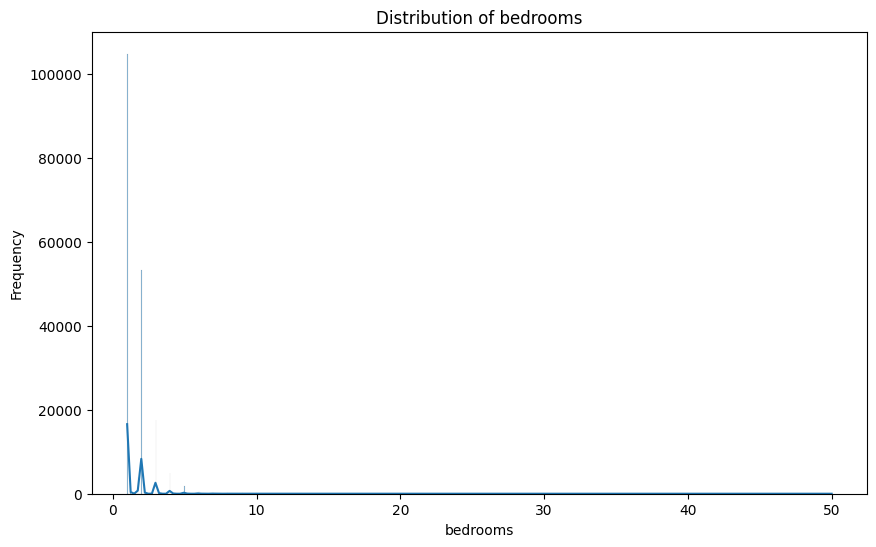

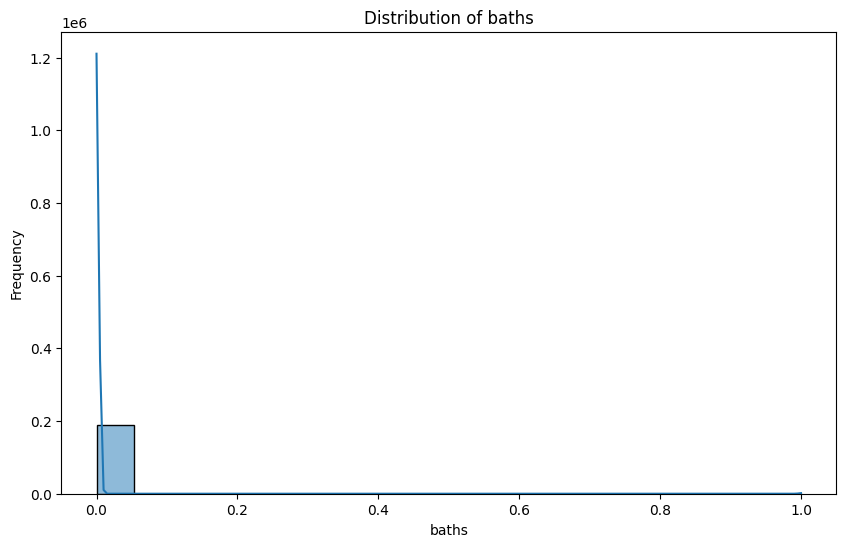

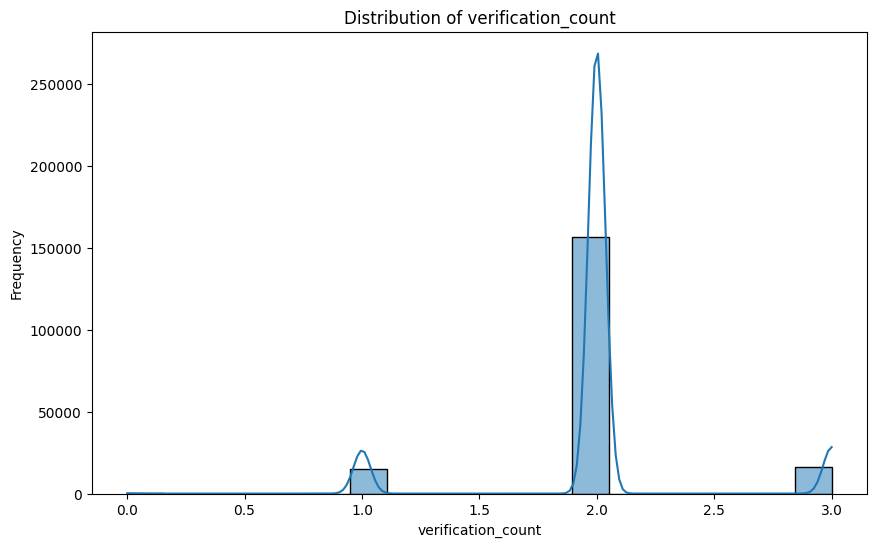

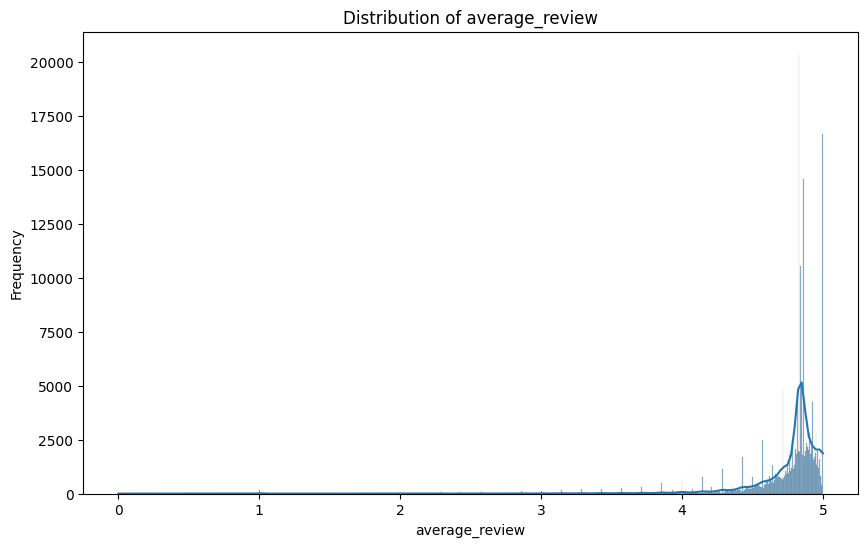

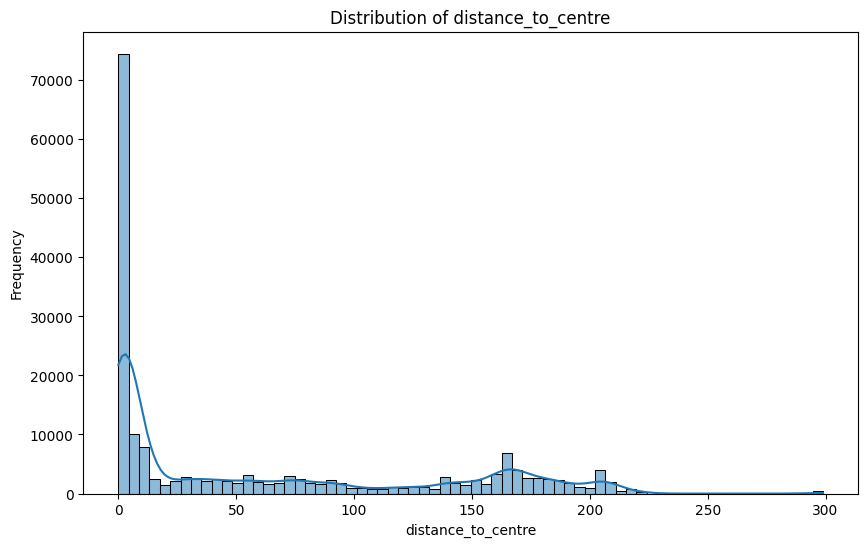

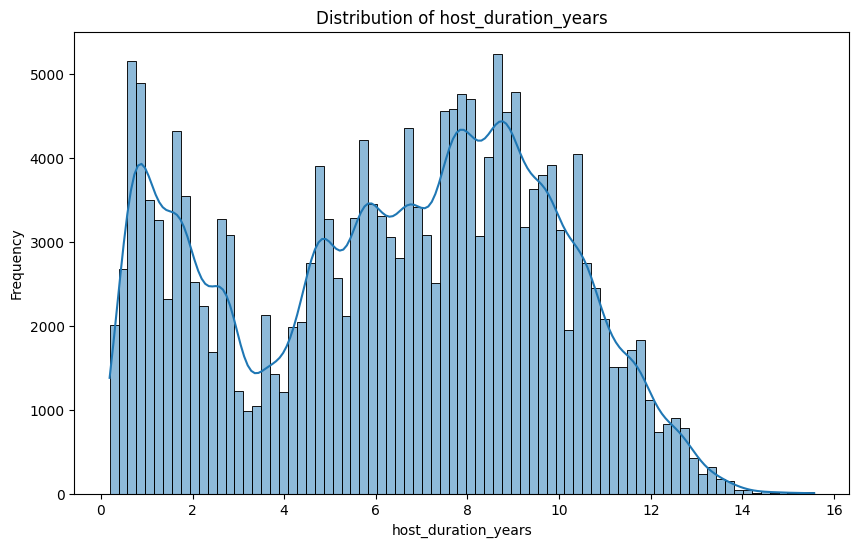

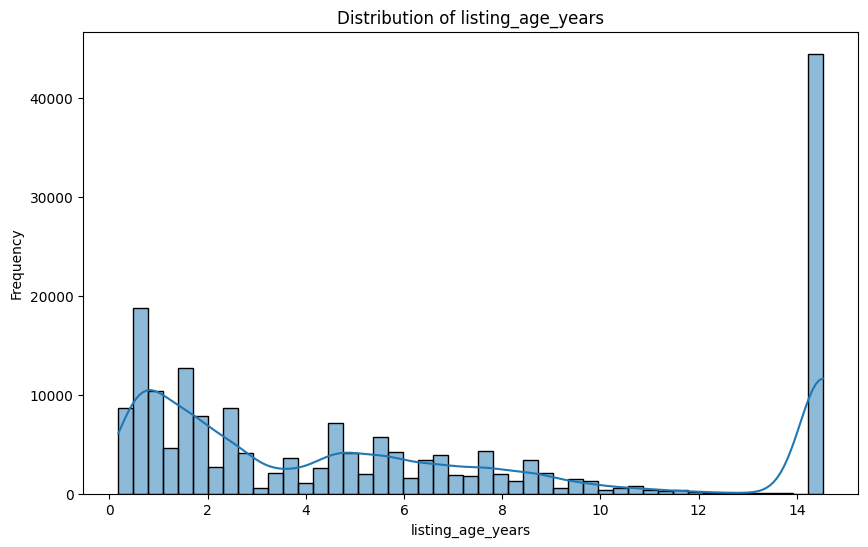

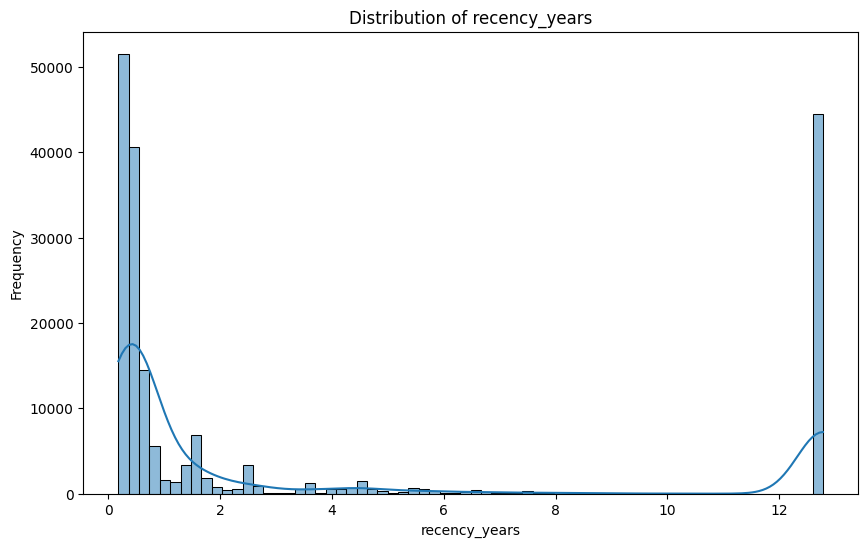

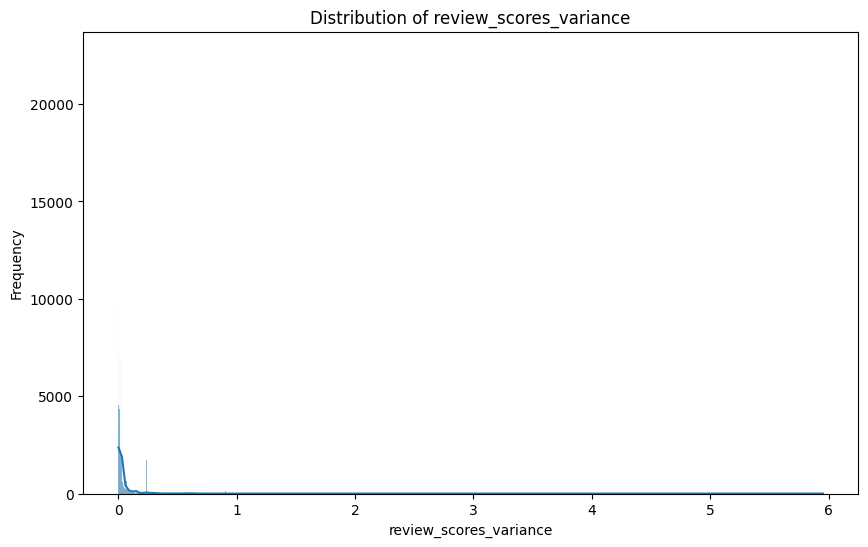

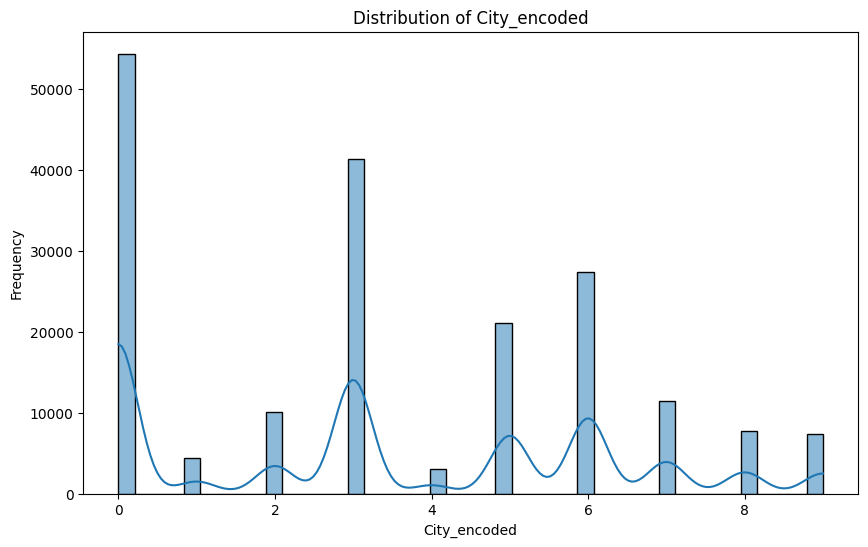

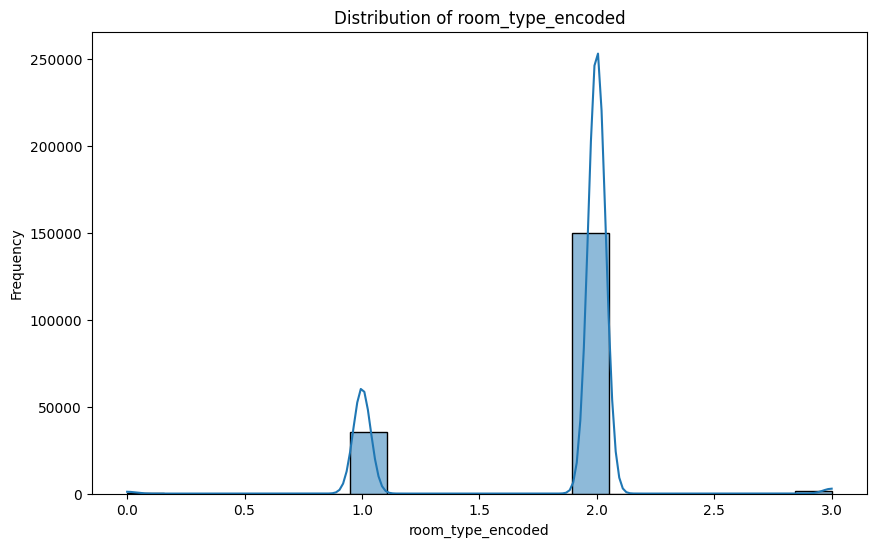

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Correlation Matrix for numerical columns only
df_numerical = data_base.select_dtypes(include=[np.number])
cor_df = df_numerical.corr(method = "pearson").round(2)
plt.figure(figsize=(12, 8))
sns.heatmap(cor_df, annot=True)
plt.show()

Outlier Detection + Scaling

In [329]:
import pandas as pd
from sklearn.preprocessing import  MinMaxScaler
import numpy as np

# Create copy so that it doesn't affect original data base
data_base_copy = data_base.copy()

# IQR
Q1 = data_base.quantile(0.25)
Q3 = data_base.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

numerical_cols = data_base_copy.select_dtypes(include=['int64', 'float64']).columns
data_base_copy= data_base_copy[~((data_base_copy[numerical_cols] < lower_bound[numerical_cols]) | 
                                (data_base_copy[numerical_cols] > upper_bound[numerical_cols])).any(axis=1)]


features_to_scale = data_base_copy.columns.difference(['price'])

# MinMaxScaler
scaler = MinMaxScaler()
data_base_copy[features_to_scale] = scaler.fit_transform(data_base_copy[features_to_scale])

# Dropping useless features
features_drop = [
    'minimum_nights_avg_ntm',
    'maximum_nights_avg_ntm'
]

data_base_copy = data_base_copy.drop(columns=features_drop, axis=1)

# Features to drop
host_columns_to_remove = [
    'host_about',
    'host_is_superhost',
    'host_listings_count',
    'host_identity_verified',
    'host_duration_years'
]

data_without_host = data_base_copy.drop(columns=host_columns_to_remove, axis=1)

In [330]:
from sklearn.model_selection import train_test_split

# Splitting in both data sets into training and testing data
X_without_host = data_without_host.drop(['price'], axis=1)
y_without_host = data_without_host['price']

X_train_without, X_test_without, y_train_without, y_test_without = train_test_split(X_without_host, y_without_host, test_size=0.2, random_state=42)

X_with_host = data_base_copy.drop(['price'], axis=1)
y_with_host = data_base_copy['price']

X_train_with, X_test_with, y_train_with, y_test_with = train_test_split(X_with_host, y_with_host, test_size=0.2, random_state=42)

XGBoosted

In [146]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [700, 800, 900],
    'max_depth': [4, 5, 6], 
    'learning_rate': [0.03, 0.04, 0.05] 
}


# XGBoosted Regressor
xg = XGBRegressor(random_state=42)

# GridSearchCV with parameter grid 
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=4,                 
    scoring='neg_mean_squared_error',  
    verbose=10,           
    n_jobs=-1            
)

# Fit GridSearchCV 
grid_search.fit(X_train_without, y_train_without)

# Store and print best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

best_mse = -grid_search.best_score_
print(f"Best MSE from GridSearchCV: {best_mse}")

# Make predictions using the best model on the test set
predictions = best_model.predict(X_test_without)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test_without, predictions)
print(f"Test set MSE: {mse_test}")

rmse_test = np.sqrt(mse_test)
print(f"Test set RMSE: {rmse_test}")

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best parameters found: {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 700}
Best MSE from GridSearchCV: 1399.4721440835672
Test set MSE: 1354.8176068218477
Test set RMSE: 36.80784708213518


In [147]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

param_grid = {
    'n_estimators': [700, 800, 900],
    'max_depth': [4, 5, 6], 
    'learning_rate': [0.03, 0.04, 0.05] # np.linspace(0.01, 0.15, num=250) [0.055, 0.065, 0.075]
}


# XGBoosted Regressor
xg = XGBRegressor(random_state=42)

# GridSearchCV with parameter grid 
grid_search = GridSearchCV(
    estimator=xg,
    param_grid=param_grid,
    cv=4,                 
    scoring='neg_mean_squared_error',  
    verbose=10,           
    n_jobs=-1            
)

# Fit GridSearchCV 
grid_search.fit(X_train_with, y_train_with)

# Store and print best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

best_mse = -grid_search.best_score_
print(f"Best MSE from GridSearchCV: {best_mse}")


predictions = best_model.predict(X_test_with)

# Calculate MSE for the test set
mse_test = mean_squared_error(y_test_with, predictions)
print(f"Test set MSE: {mse_test}")

rmse_test = np.sqrt(mse_test)
print(f"Test set RMSE: {rmse_test}")

Fitting 4 folds for each of 27 candidates, totalling 108 fits
Best parameters found: {'learning_rate': 0.05, 'max_depth': 4, 'n_estimators': 800}
Best MSE from GridSearchCV: 1372.5840771691214
Test set MSE: 1333.2318997836235
Test set RMSE: 36.513448204512585


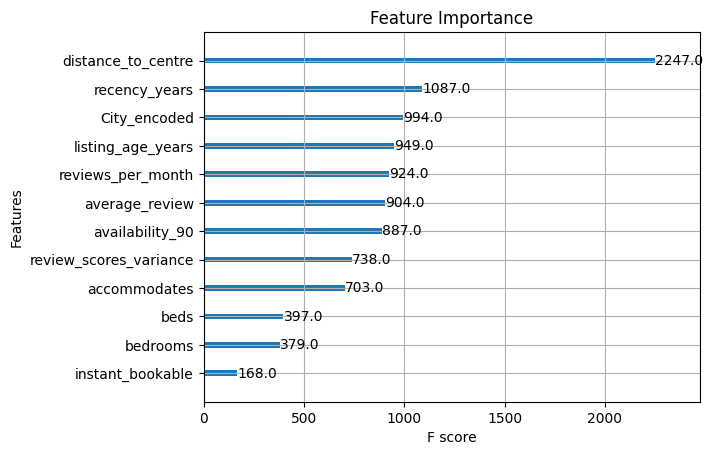

Root Mean Squared Error with XGBoost: 42.02885368078035
R^2 Score: 0.30921034608507814
Mean Absolute Error: 31.81791126316117


In [235]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

train = xgb.DMatrix(X_train_without, label=y_train_without)
test = xgb.DMatrix(X_test_without, label=y_test_without)

# XGBoost parameters
params = {
    'max_depth': 4,  
    'eta': 0.04,  
    'objective': 'reg:squarederror',  
    'eval_metric': 'rmse'  
}
trees = 700 

# Train the model
model = xgb.train(params, train, trees)

predictions = model.predict(test)

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test_without, predictions))
print("Root Mean Squared Error with XGBoost:", rmse_xgb)

r2 = r2_score(y_test_without, predictions)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_without, predictions)
print(f"Mean Absolute Error: {mae}")




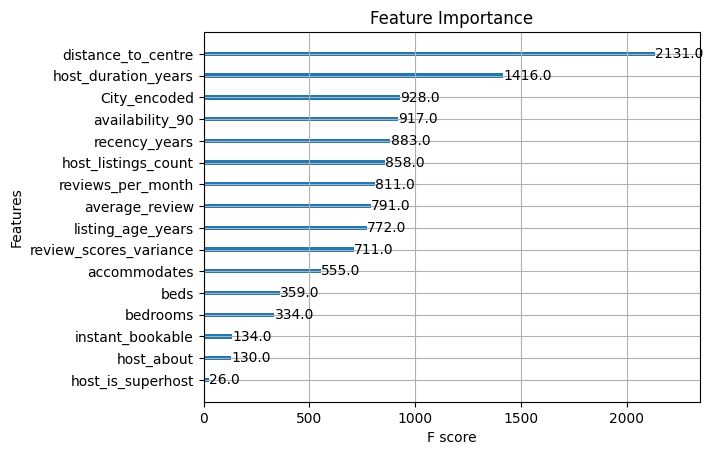

Root Mean Squared Error with XGBoost: 41.43756364073811
R^2 Score: 0.3285106021280787
Mean Absolute Error: 31.30326782421252


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [331]:
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error


model = XGBRegressor(n_estimators=800,max_depth=4, learning_rate=0.05, random_state=42)
model.fit(X_train_with, y_train_with)

predictions = model.predict(X_test_with)

xgb.plot_importance(model)
plt.title('Feature Importance')
plt.show()

# Evaluate the model
rmse_xgb = np.sqrt(mean_squared_error(y_test_with, predictions))
print("Root Mean Squared Error with XGBoost:", rmse_xgb)

r2 = r2_score(y_test_with, predictions)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_with, predictions)
print(f"Mean Absolute Error: {mae}")

model = XGBRegressor(random_state=42)
model.fit(X_train_with, y_train_with)

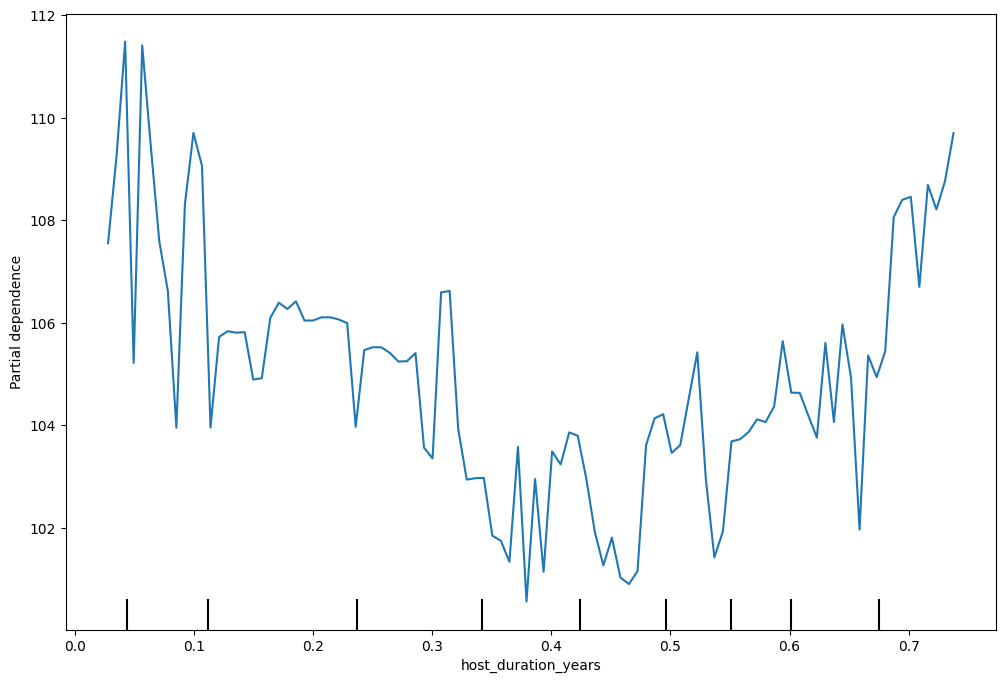

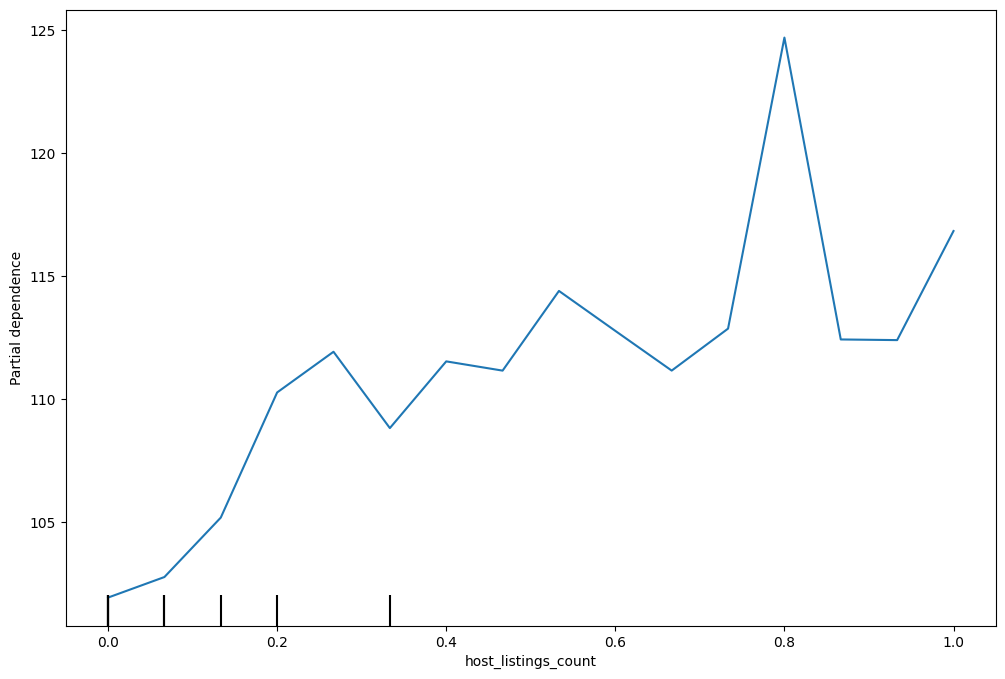

In [332]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train_with, features=['host_duration_years'], ax=ax)
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train_with, features=['host_listings_count'], ax=ax)
plt.show()

Random Forest

In [156]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [600, 700],  
    'max_features': [0.3, 0.4, 0.5], 
    'max_depth': [16, 18]   
}

# Random Forest Regressor
forest = RandomForestRegressor(random_state=42)

# Use GridSearchCV with the parameter grid
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=4,                 
    scoring='neg_mean_squared_error',  
    verbose=10,           
    n_jobs=-1             
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_without, y_train_without)

# Store and print best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found: {'max_depth': 16, 'max_features': 0.4, 'n_estimators': 700}


In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [600, 700],  
    'max_features': [0.3, 0.4, 0.5], 
    'max_depth': [16, 18]   
}

# Random Forest Regressor
forest = RandomForestRegressor(random_state=42)

# Use GridSearchCV with the parameter grid
grid_search = GridSearchCV(
    estimator=forest,
    param_grid=param_grid,
    cv=4,                 
    scoring='neg_mean_squared_error',  
    verbose=10,           
    n_jobs=-1             
)

# Fit GridSearchCV to the training data
grid_search.fit(X_train_with, y_train_with)

# Store and print best parameters and the best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best parameters found:", best_params)

Fitting 4 folds for each of 12 candidates, totalling 48 fits
Best parameters found: {'max_depth': 16, 'max_features': 0.4, 'n_estimators': 700}


Root Mean Squared Error with RandomForestRegressor: 42.348705499078804
R^2 Score: 0.29865611699651196
Mean Absolute Error: 32.24763998540805


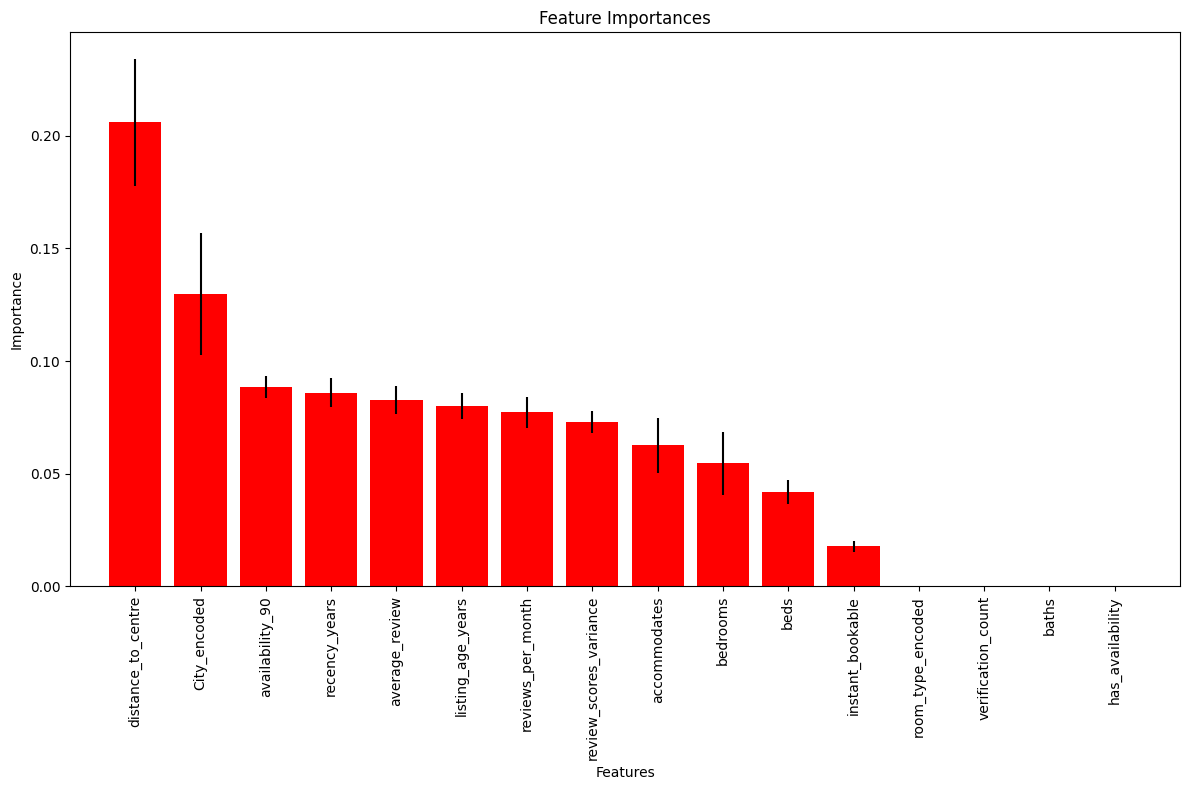

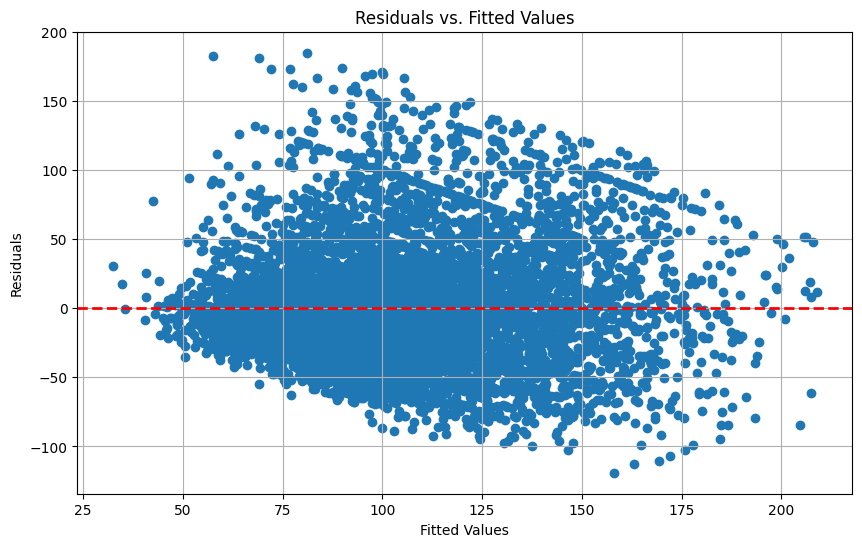

In [236]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=700, 
    max_depth=16, 
    max_features=0.4,
    random_state=42
)

# Fit the model
rf_model.fit(X_train_without, y_train_without)

# Predict
predictions_rf = rf_model.predict(X_test_without)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test_without, predictions_rf))
print("Root Mean Squared Error with RandomForestRegressor:", rmse_rf)

r2 = r2_score(y_test_without, predictions_rf)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_without, predictions_rf)
print(f"Mean Absolute Error: {mae}")

# Find feature importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_train_without.columns[indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))  
plt.title("Feature Importances")
plt.bar(range(X_train_without.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_without.shape[1]), feature_names, rotation='vertical')  
plt.xlim([-1, X_train_without.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout() 
plt.show()


# Plot residuals
residuals = y_test_without - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

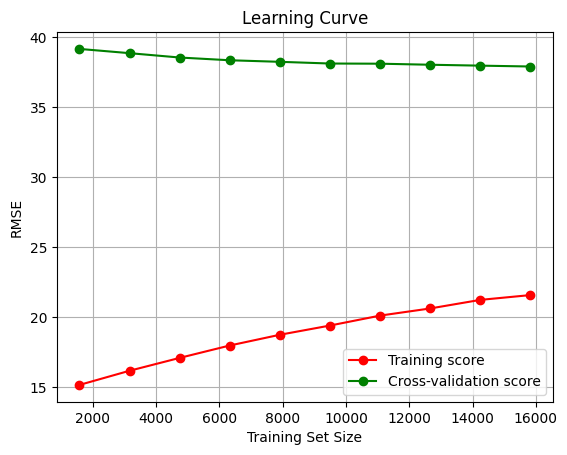

In [183]:
from sklearn.model_selection import learning_curve

# Plot Learning Curve (Takes 10 minutes)
train_sizes, train_scores, validation_scores = learning_curve(estimator=rf_model,
                                                                X=X_train_without, y=y_train_without,
                                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                                cv=5, scoring='neg_mean_squared_error')

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
validation_scores_mean = np.sqrt(-validation_scores.mean(axis=1))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Root Mean Squared Error with RandomForestRegressor: 41.70880519346765
R^2 Score: 0.31969097461037677
Mean Absolute Error: 31.726689870028327


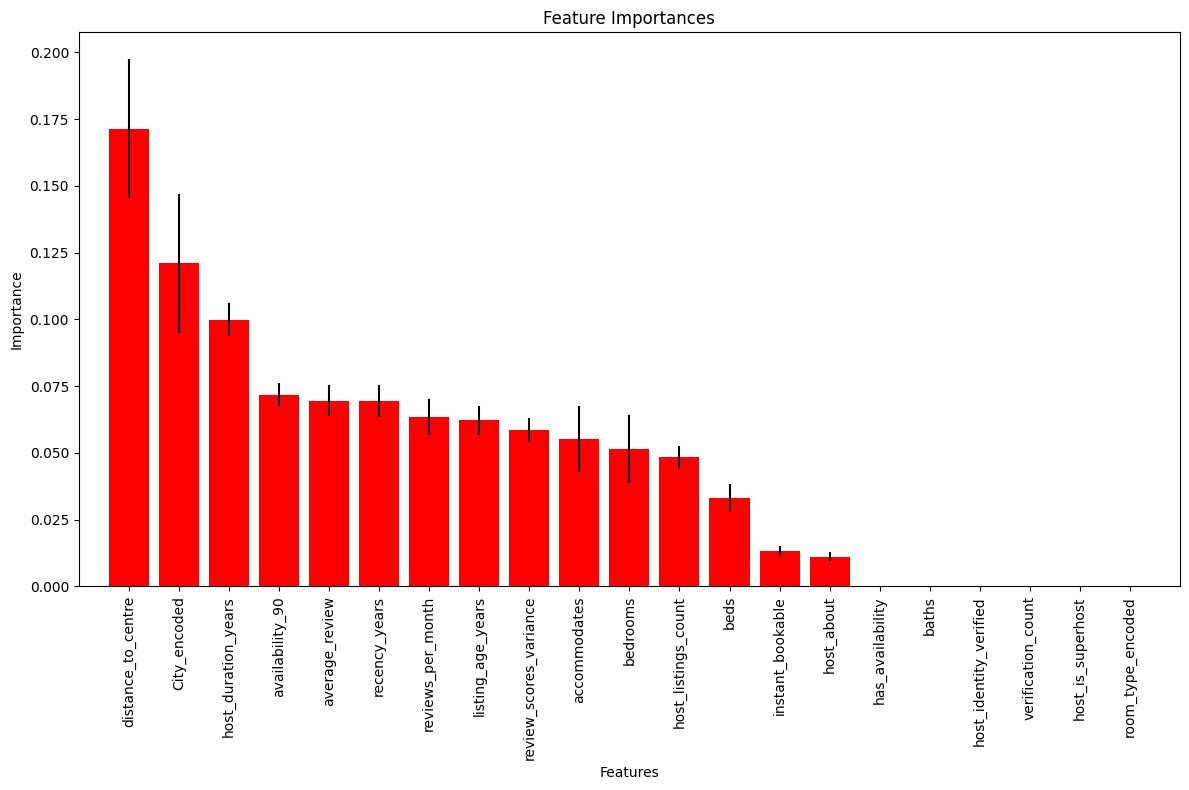

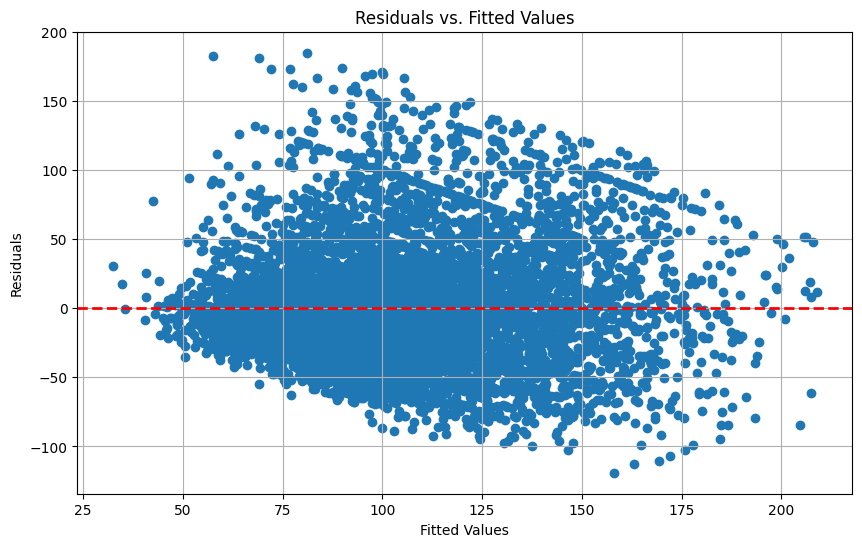

In [237]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Initialize the Random Forest model
rf_model = RandomForestRegressor(
    n_estimators=700, 
    max_depth=16, 
    max_features=0.4,
    random_state=42
)

# Fit the model
rf_model.fit(X_train_with, y_train_with)

# Predict
predictions_rf = rf_model.predict(X_test_with)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test_with, predictions_rf))
print("Root Mean Squared Error with RandomForestRegressor:", rmse_rf)

r2 = r2_score(y_test_with, predictions_rf)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_with, predictions_rf)
print(f"Mean Absolute Error: {mae}")

# Find feature importance
importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = X_train_with.columns[indices]

# Plot the feature importances
plt.figure(figsize=(12, 8))  
plt.title("Feature Importances")
plt.bar(range(X_train_with.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train_with.shape[1]), feature_names, rotation='vertical')  
plt.xlim([-1, X_train_with.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout() 
plt.show()

residuals = y_test_with - predictions

plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid(True)
plt.show()

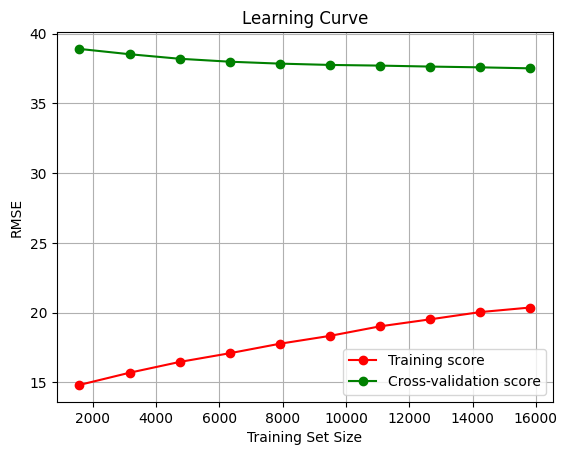

In [181]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator=rf_model,
                                                                X=X_train_with, y=y_train_with,
                                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                                cv=5, scoring='neg_mean_squared_error')

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
validation_scores_mean = np.sqrt(-validation_scores.mean(axis=1))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

Stacked Model

In [238]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

base_models = [
    ('rf', RandomForestRegressor(n_estimators = 700,
    max_depth= 16,
    max_features = 0.4,
    random_state = 42, 
    n_jobs=-1)),
    ('xgb', XGBRegressor(n_estimators=700,
    max_depth=4, 
    learning_rate=0.04, 
    random_state=42)),
    ('rf2', RandomForestRegressor(n_estimators = 500,
    max_depth= 16,
    max_features = 0.4,
    random_state = 42, 
    n_jobs=-1)),
    ('xgb2', XGBRegressor(n_estimators=300,
    max_depth=3, 
    learning_rate=0.03, 
    random_state=42))
]

meta_learner = LinearRegression()

stacked_model = StackingRegressor(  
        estimators=base_models,
        final_estimator=meta_learner,
        cv=8,  
        n_jobs=-1
    )

stacked_model.fit(X_train_without, y_train_without)

# Make prediction
predictions = stacked_model.predict(X_test_without)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_without, predictions))
print("Root Mean Squared Error with Stacking:", rmse)

r2 = r2_score(y_test_without, predictions)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_without, predictions)
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error with Stacking: 41.79225259632363
R^2 Score: 0.31696604344338286
Mean Absolute Error: 31.578041614502418


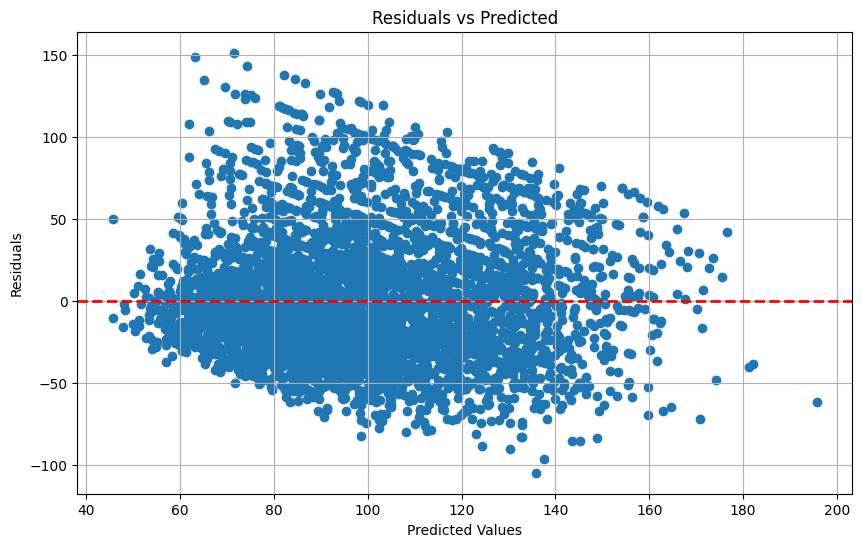

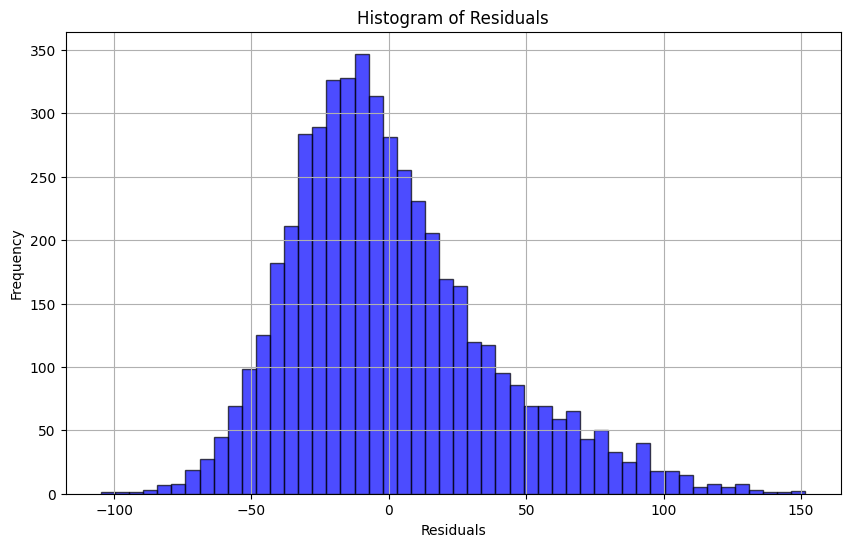

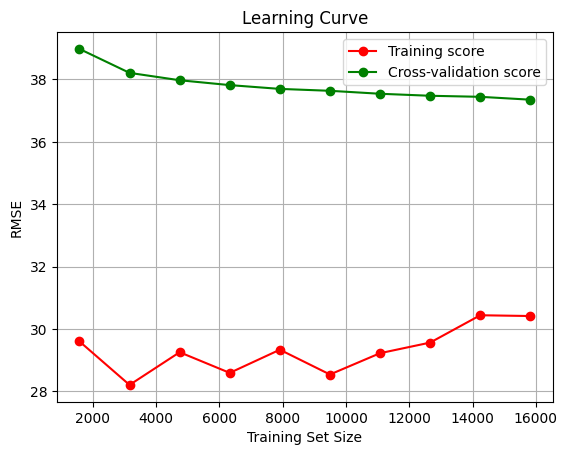

In [177]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test_without - predictions

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator=stacked_model,
                                                                X=X_train_without, y=y_train_without,
                                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                                cv=5, scoring='neg_mean_squared_error')

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
validation_scores_mean = np.sqrt(-validation_scores.mean(axis=1))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()

In [239]:
from sklearn.ensemble import StackingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

base_models = [
    ('rf', RandomForestRegressor(n_estimators = 700,
    max_depth= 16,
    max_features = 0.4,
    random_state = 42, 
    n_jobs=-1)),
    ('rf2', RandomForestRegressor(n_estimators = 500,
    max_depth= 16,
    max_features = 0.4,
    random_state = 42, 
    n_jobs=-1)),
    ('xgb', XGBRegressor(n_estimators=800,
    max_depth=5, 
    learning_rate=0.04, 
    random_state=42)),
    ('xgb2', XGBRegressor(n_estimators=300,
    max_depth=3, 
    learning_rate=0.03, 
    random_state=42))
]

meta_learner = LinearRegression()

stacked_model = StackingRegressor(  
        estimators=base_models,
        final_estimator=meta_learner,
        cv=8,  
        n_jobs=-1
    )

stacked_model.fit(X_train_with, y_train_with)

# Make prediction
predictions = stacked_model.predict(X_test_with)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test_with, predictions))
print("Root Mean Squared Error with Stacking:", rmse)

r2 = r2_score(y_test_with, predictions)
print(f"R^2 Score: {r2}")

mae = mean_absolute_error(y_test_with, predictions)
print(f"Mean Absolute Error: {mae}")

Root Mean Squared Error with Stacking: 41.081673935556594
R^2 Score: 0.33999534738551873
Mean Absolute Error: 30.954130708421303


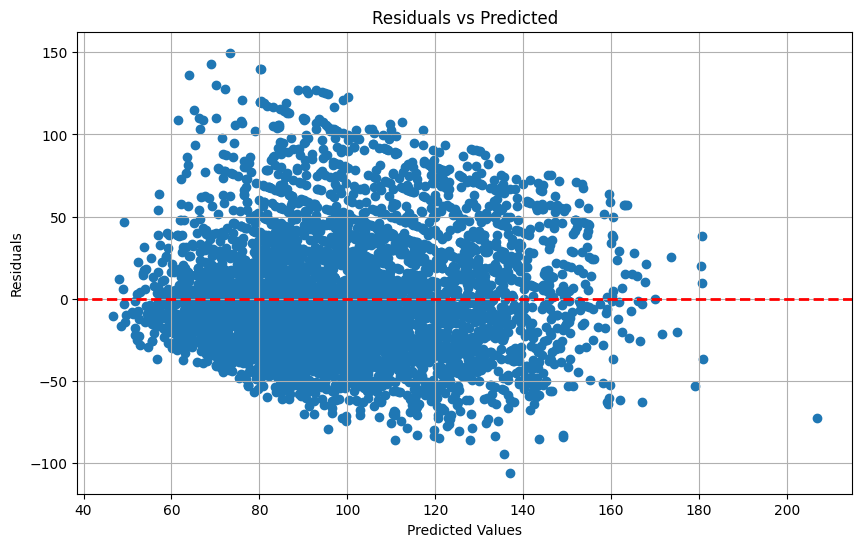

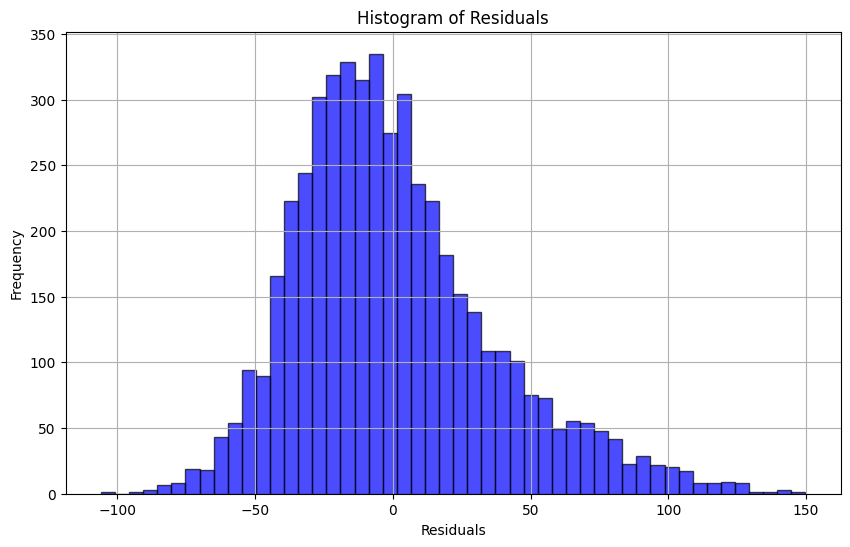

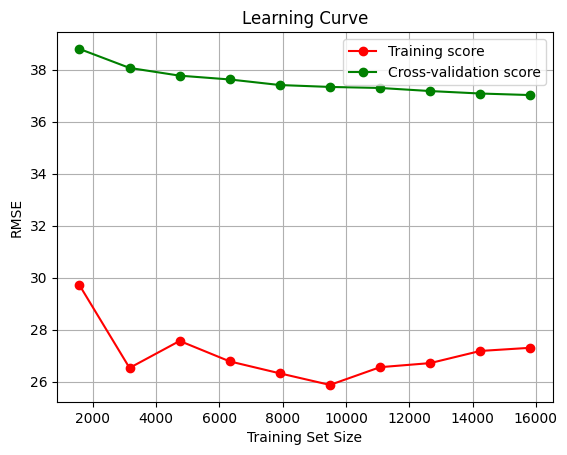

In [175]:
import matplotlib.pyplot as plt

# Calculate the residuals
residuals = y_test_with - predictions

# Create the residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals)
plt.axhline(0, linestyle='--', color='red', linewidth=2)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7, color='blue', edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

from sklearn.model_selection import learning_curve

train_sizes, train_scores, validation_scores = learning_curve(estimator=stacked_model,
                                                                X=X_train_with, y=y_train_with,
                                                                train_sizes=np.linspace(0.1, 1.0, 10),
                                                                cv=5, scoring='neg_mean_squared_error')

train_scores_mean = np.sqrt(-train_scores.mean(axis=1))
validation_scores_mean = np.sqrt(-validation_scores.mean(axis=1))

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curve')
plt.legend(loc="best")
plt.grid(True)
plt.show()